# EDA

In [1]:
# prevent vertical scrolling windows
# also, this needs to be the first code cell
# or else it might not work properly

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle
%matplotlib inline
sns.set()
sns.set_context('poster')
sns.set_style("darkgrid")

In [4]:
start = datetime.datetime.time(datetime.datetime.now())

### Preliminary EDA on 2010 data

#### Data import

In [5]:
df_2010 = pd.read_csv('../data/merged/eda_2010.csv')

In [6]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 191 entries, year to murder_per_100_k
dtypes: float64(173), int64(17), object(1)
memory usage: 140.3+ KB


#### Histogram

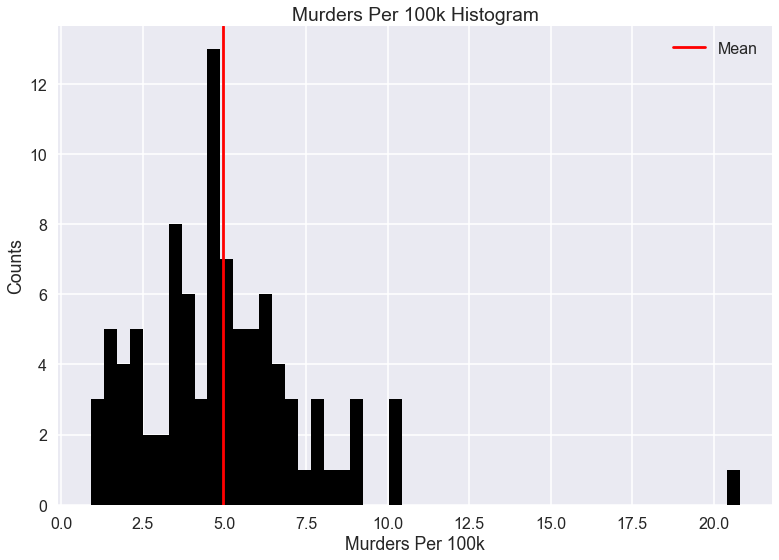

In [7]:
with sns.axes_style("darkgrid"):
    plt.hist(df_2010.murder_per_100_k.values, bins=50, facecolor='black')
    plt.axvline(df_2010.murder_per_100_k.mean(), 0, 1, color='r', label='Mean')
    plt.xlabel("Murders Per 100k")
    plt.ylabel("Counts")
    plt.title("Murders Per 100k Histogram")
    plt.legend()

In [8]:
# drop column 145 because it contains blanks
df_2010 = df_2010.drop(
    ['poverty_married-couple_family_with_related_children_under_5_years_only'], axis=1)

In [9]:
relevant_cols = ['family_households_married-couple_family',
                 'family_household_married_couple_family_with_own_children_under_18_years',
                 'family_households_female_householder_no_husband_present',
                 'family_households_female_householder_no_husband_present_with_own_children_under_18',
                 'now_married_except_separated',
                 'less_than_high_school_diploma',
                 'high_school_graduate_or_higher',
                 'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
                 'civilian_noninst_population_18_to_64_years_with_a_disability',
                 'civilian_noninst_population_65_years_and_older_with_a_disability',
                 'industry_transportation_and_warehousing_and_utilities',
                 'median_household_income_(dollars)',
                 'households_with_supplemental_security_income',
                 'households_with_food_stamp_snap_benefits',
                 'median_family_income_(dollars)',
                 'percentage_married-couple_family',
                 'percentage_female_householder_no_husband_present_family',
                 'poverty_all_families',
                 'poverty_all_families_with_related_children_under_18_years',
                 'poverty_all_families_with_related_children_under_18_years_with_related_children_under_5_years_only',
                 'poverty_all_people',
                 'poverty_65_years_and_over',
                 'no_telephone_service_available',
                 'house_median_value_(dollars)',
                 'murder_per_100_k']

In [10]:
selected_cols = ['unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
                 'percentage_female_householder_no_husband_present_family',
                 'poverty_all_people',
                 'households_with_food_stamp_snap_benefits',
                 'less_than_high_school_diploma',
                 'now_married_except_separated',
                 'percentage_married-couple_family',
                 'house_median_value_(dollars)',
                 'murder_per_100_k']

In [11]:
selected_col_x_vals = ['Unmarried Percent Of Women Who Gave Birth In Last 12 Months',
                       'Female Householder No Husband Present Family (% Of Families)',
                       'Living In Poverty (% Of Pop.)',
                       'Collects Food Stamp Benefits (% Of Households)',
                       'Less Than High School Diploma (% Of Pop.)',
                       'Married Except Separated (% Of Pop.)',
                       'Married-Couple Family (% Of Families)',
                       'House Median Value (Dollars)',
                       'Murders Per 100,000 People']

#### Scatter plots

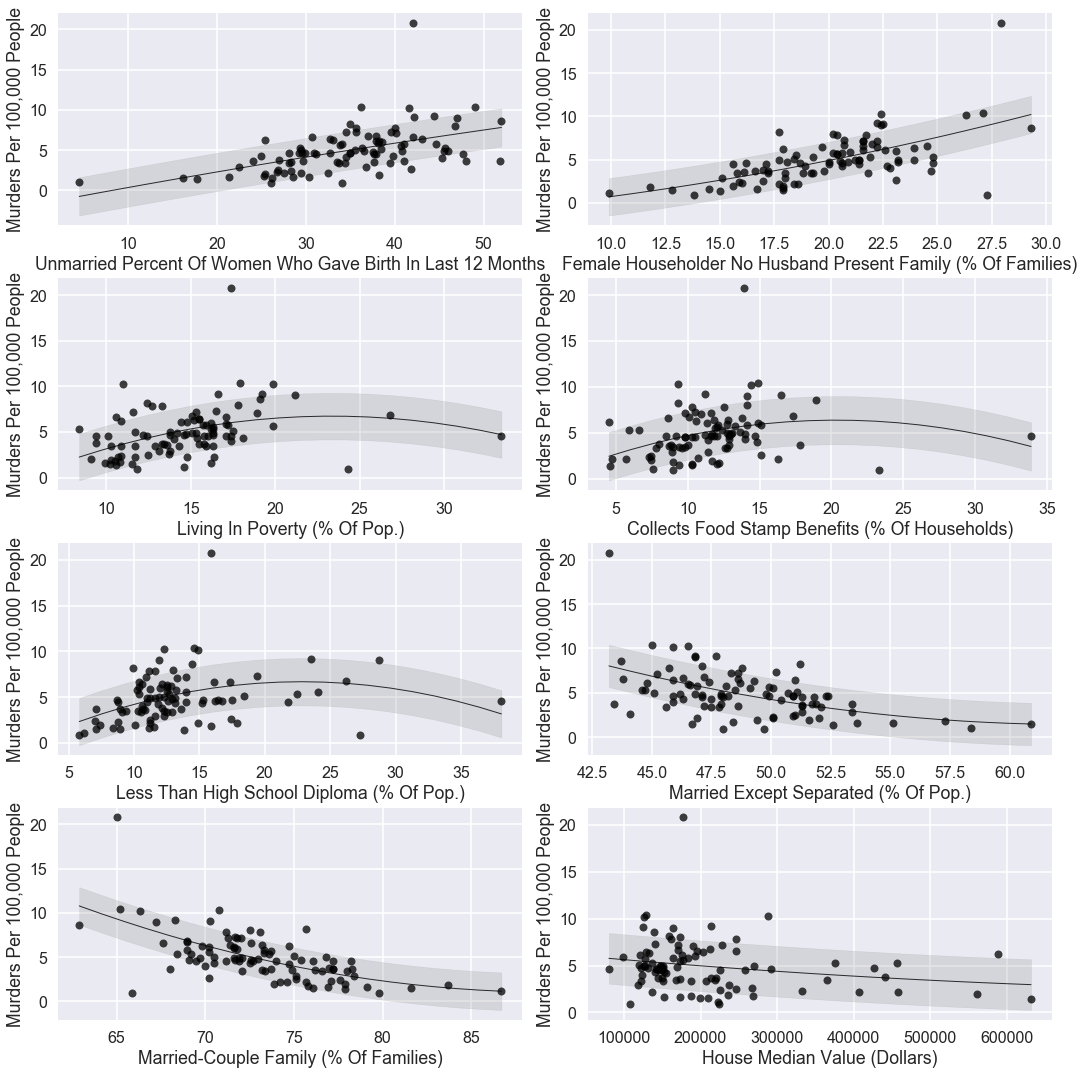

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
plt.tight_layout()
x_vals = np.linspace(0, 1, 100)
x_vals = x_vals.reshape(len(x_vals),1)
ax = ax.ravel()
y = df_2010.murder_per_100_k
for i in range(0, len(selected_cols)-1):
    x = df_2010[selected_cols[i]]
    params = np.polyfit(x, y, 2)
    xp = np.linspace(x.min(), x.max(), 20)
    yp = np.polyval(params, xp)
    ax[i].plot(xp, yp, 'k', alpha=0.8, linewidth=1)
    ax[i].plot(x, y, 'o', markersize=8, alpha=0.75, color='black')
    sig = np.std(y - np.polyval(params, x))
    ax[i].fill_between(xp, yp - sig, yp + sig, color='gray', alpha=0.2)
    ax[i].set_xlabel(selected_col_x_vals[i])
    ax[i].set_ylabel(selected_col_x_vals[-1])

#### Check very strong correlations

In [13]:
corrs = df_2010.corr().abs()

In [14]:
cols_using = ['family_households_married-couple_family',
              'family_household_married_couple_family_with_own_children_under_18_years',
              'family_households_female_householder_no_husband_present',
              'family_households_female_householder_no_husband_present_with_own_children_under_18',
              'now_married_except_separated',
              'less_than_high_school_diploma',
              'high_school_graduate_or_higher',
              'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
              'civilian_noninst_population_18_to_64_years_with_a_disability',
              'civilian_noninst_population_65_years_and_older_with_a_disability',
              'industry_transportation_and_warehousing_and_utilities',
              'median_household_income_(dollars)',
              'households_with_supplemental_security_income',
              'households_with_food_stamp_snap_benefits',
              'median_family_income_(dollars)',
              'percentage_married-couple_family',
              'percentage_female_householder_no_husband_present_family',
              'poverty_all_families',
              'poverty_all_families_with_related_children_under_18_years',
              'poverty_all_families_with_related_children_under_18_years_with_related_children_under_5_years_only',
              'poverty_all_people',
              'poverty_65_years_and_over',
              'no_telephone_service_available',
              'house_median_value_(dollars)',
              'murder_per_100_k'
             ]

In [15]:
corrs_used = corrs[cols_using]
corrs_used = corrs_used.rename(columns={'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months':
                               'unmarried_women_who_had_a_birth_in_past_12_months'})

In [16]:
cols_important = [
    'now_married_except_separated',
    'less_than_high_school_diploma',
    'unmarried_women_who_had_a_birth_in_past_12_months',
    'households_with_food_stamp_snap_benefits',
    'percentage_married-couple_family',
    'percentage_female_householder_no_husband_present_family',
    'poverty_all_people',
    'house_median_value_(dollars)',
    'murder_per_100_k'
]

In [17]:
feat = dict()

top_n = 21

for n,i in corrs_used.iteritems():
    i_sorted = i.sort_values(ascending=False)
    topkeys = i_sorted.keys()[:top_n]
    top_cors = [(k,i[k]) for k in topkeys if n != k]
    feat[n] = top_cors

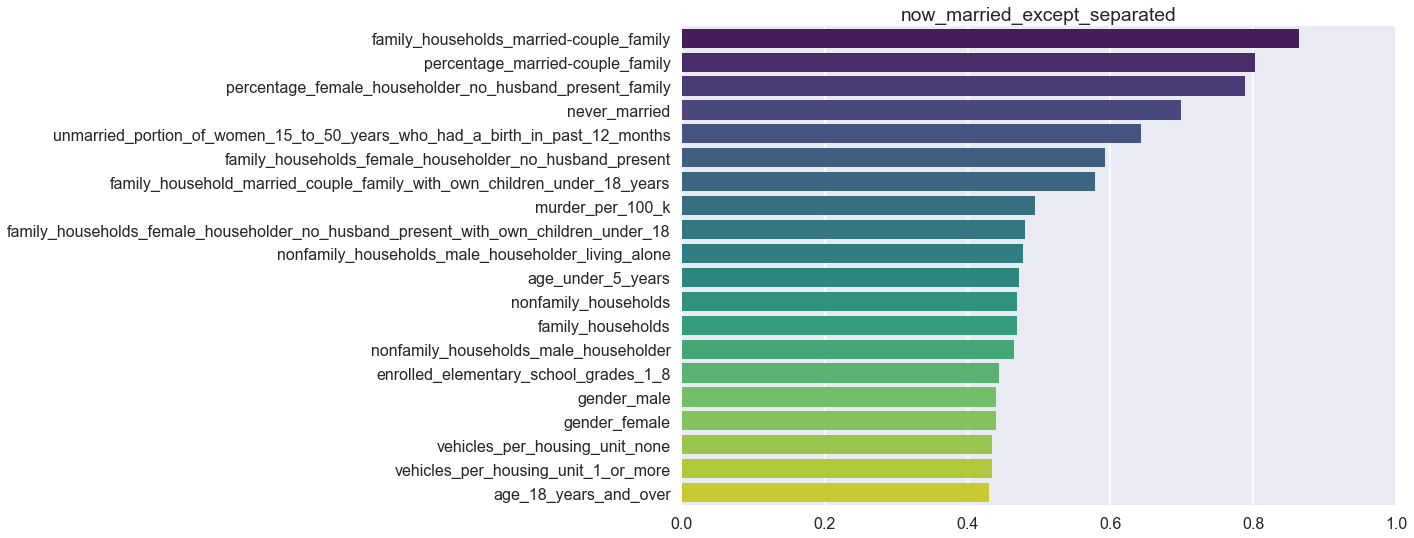

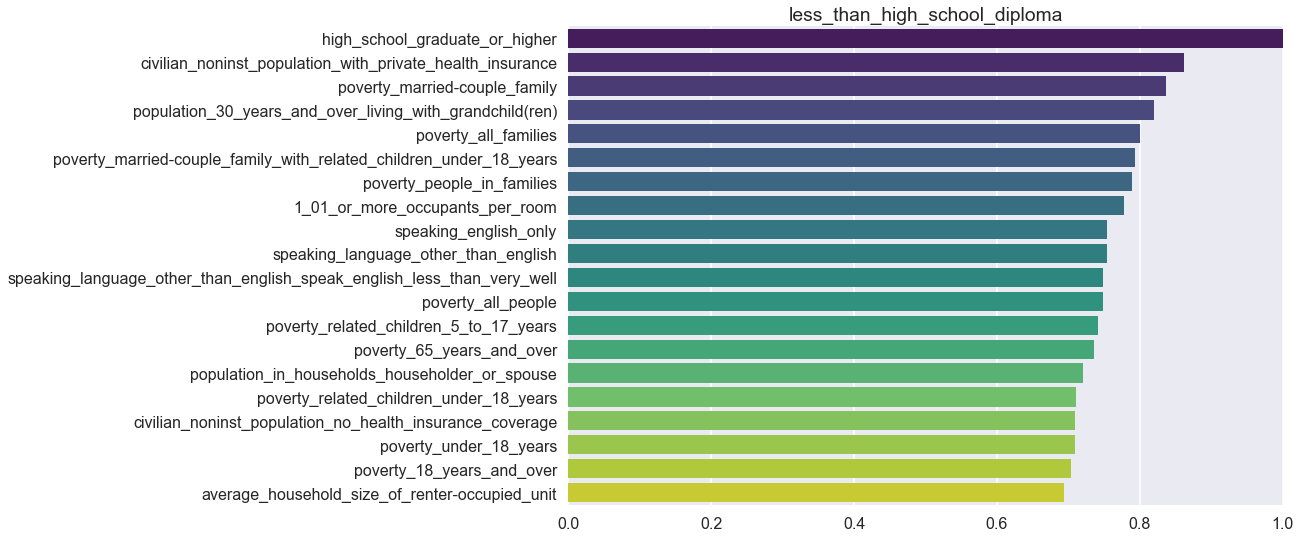

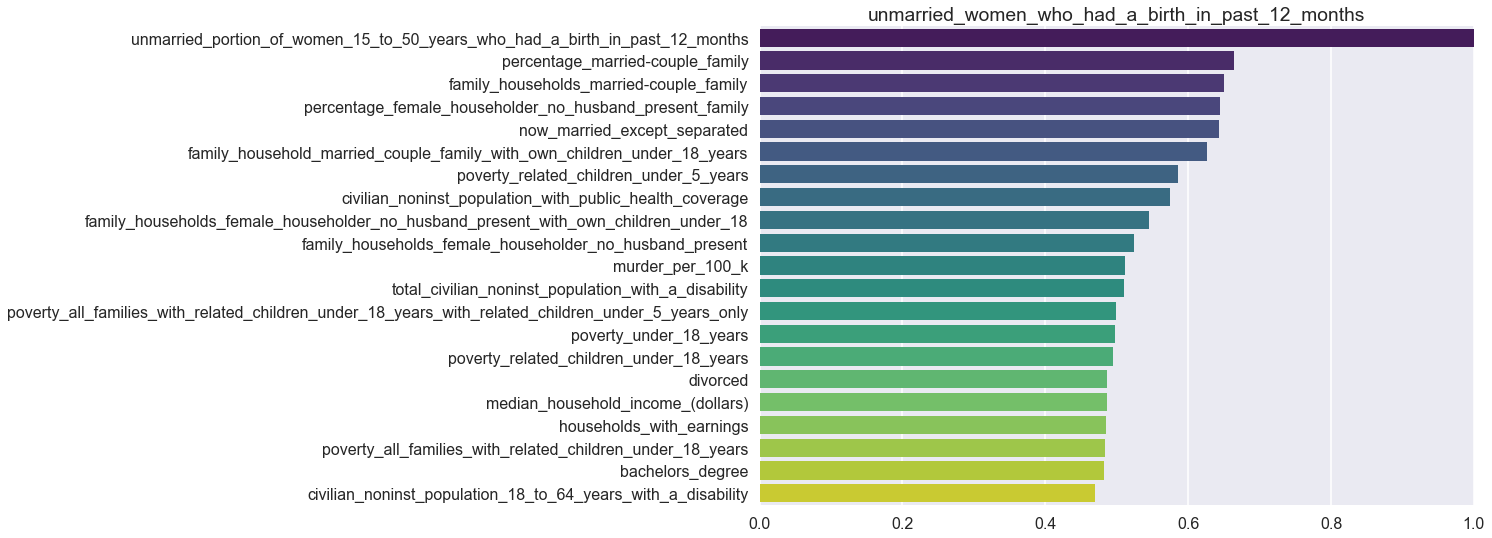

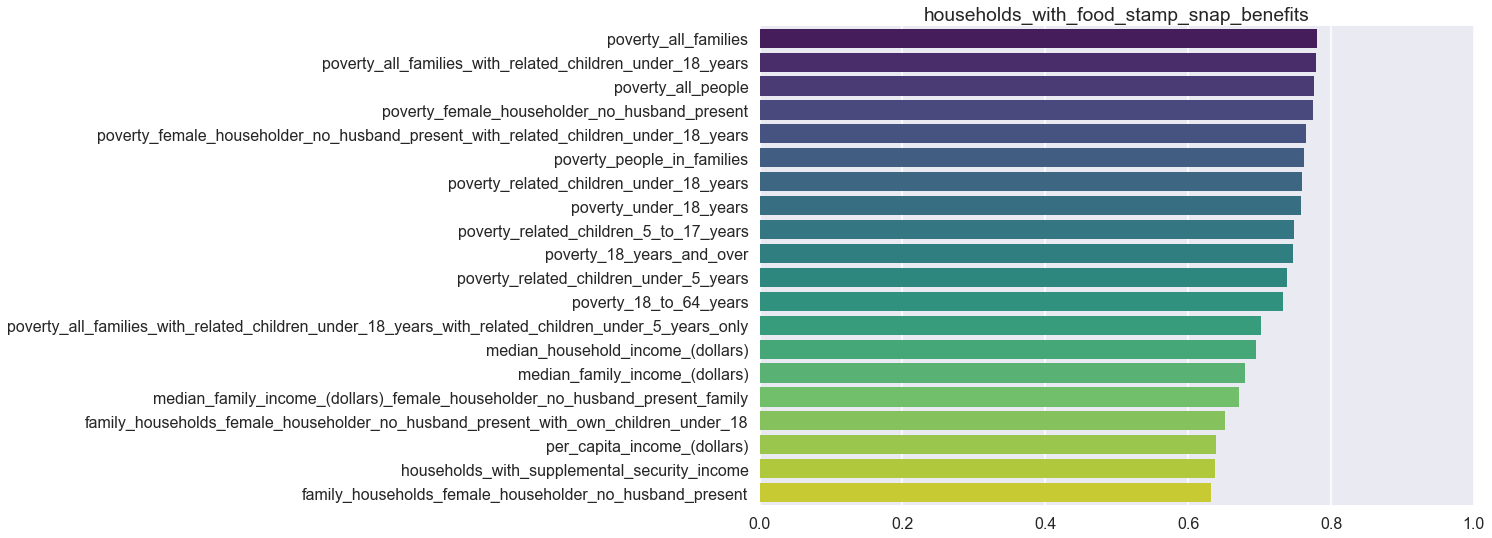

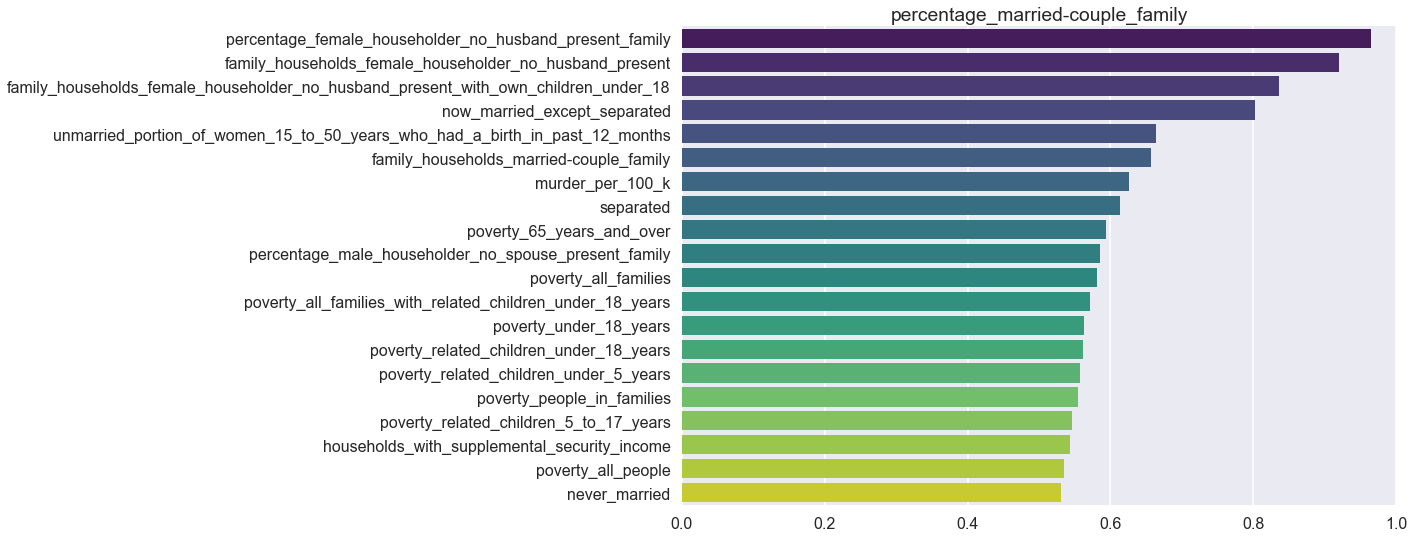

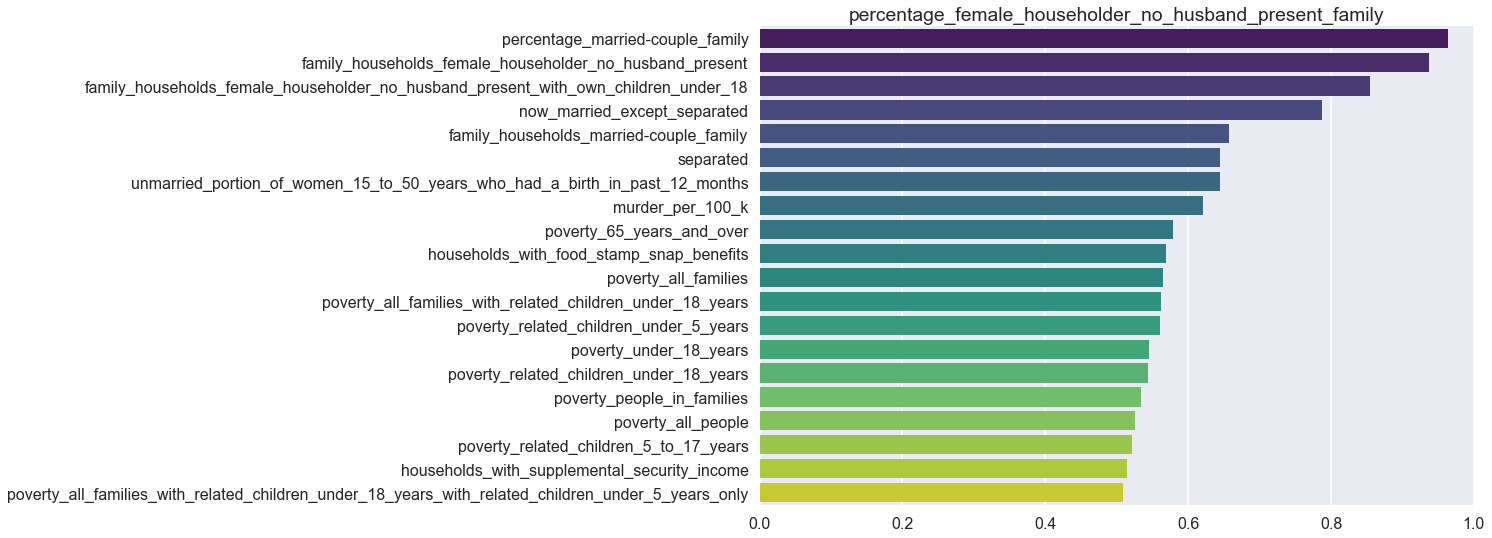

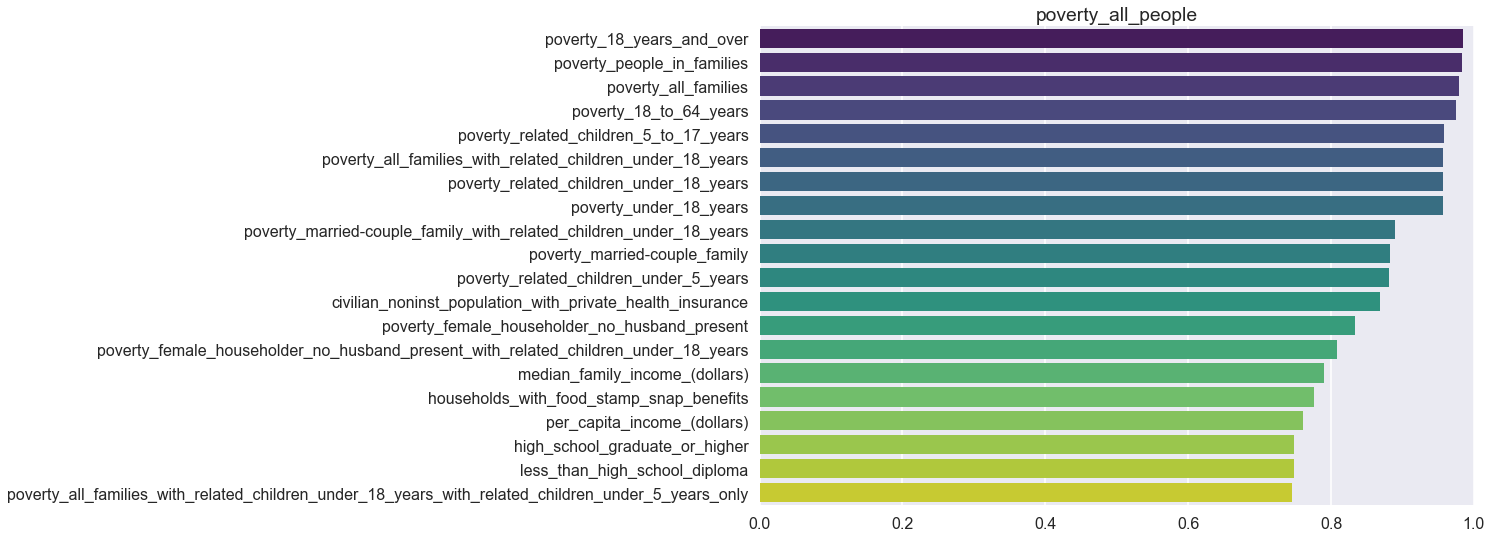

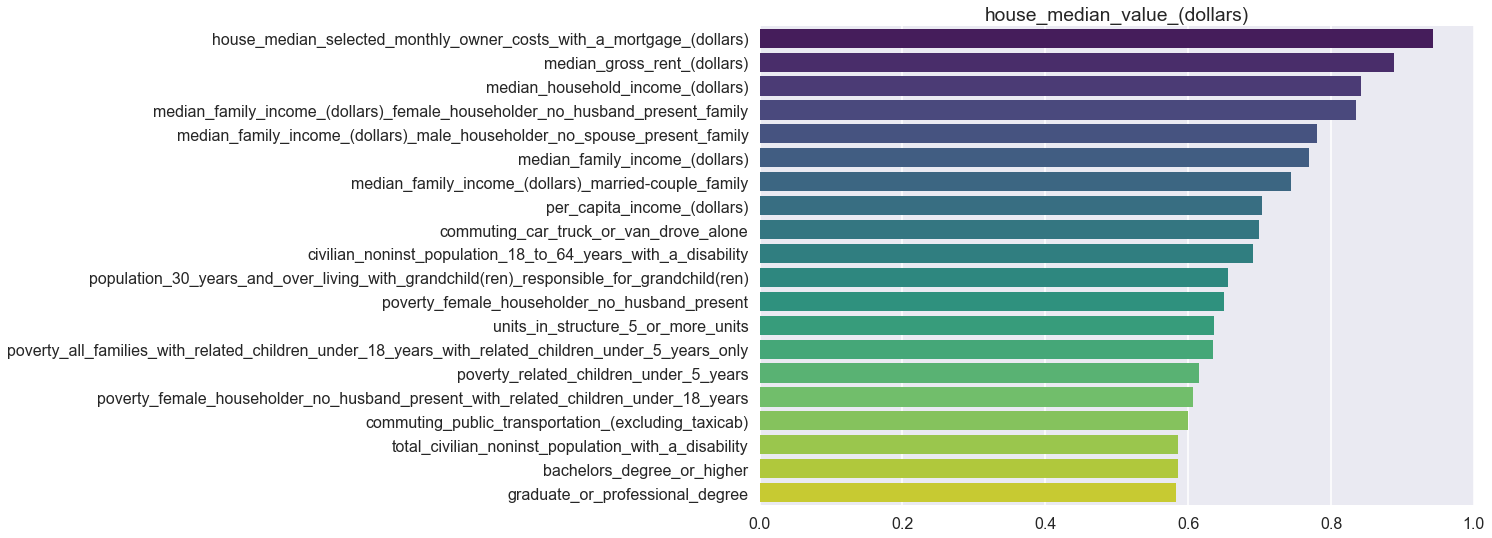

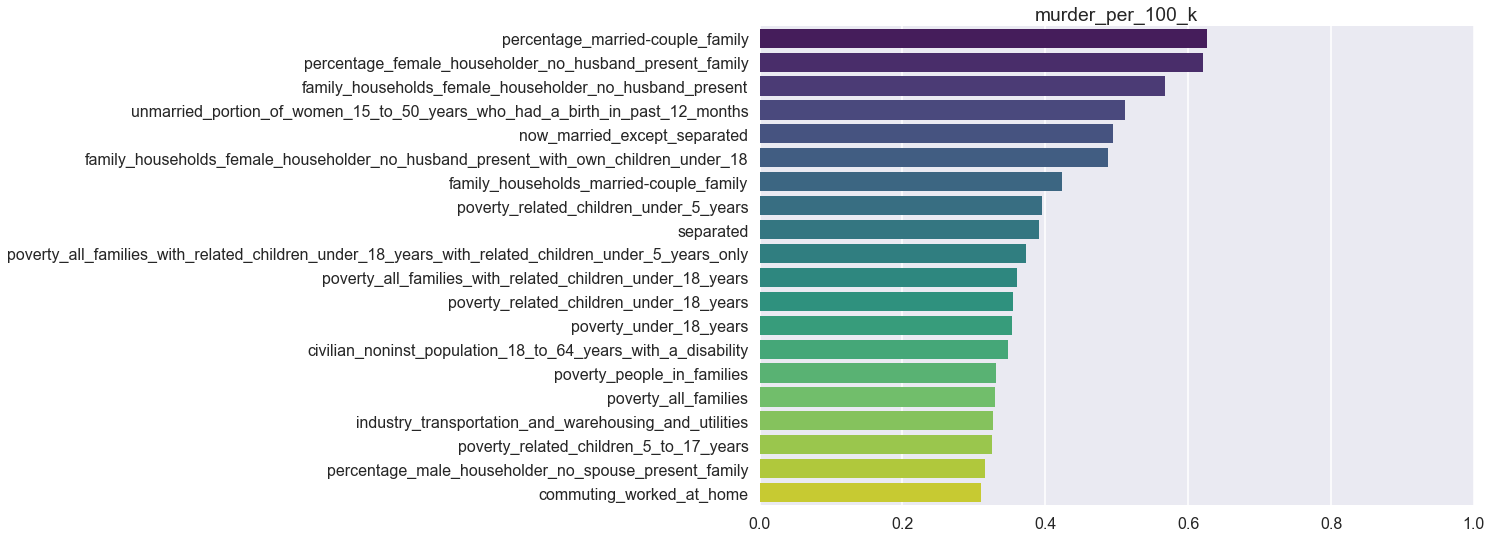

In [18]:
n_plots = len(cols_important)

for i,f in enumerate(cols_important):
    items = feat[f]
    labels = list(zip(*items))[0]
    scores = list(zip(*items))[1]

    if True:
        plt.figure(i)
        
    sns.barplot(scores, labels, palette='viridis')
    plt.xlim(0.,1.0)
    plt.title(f)

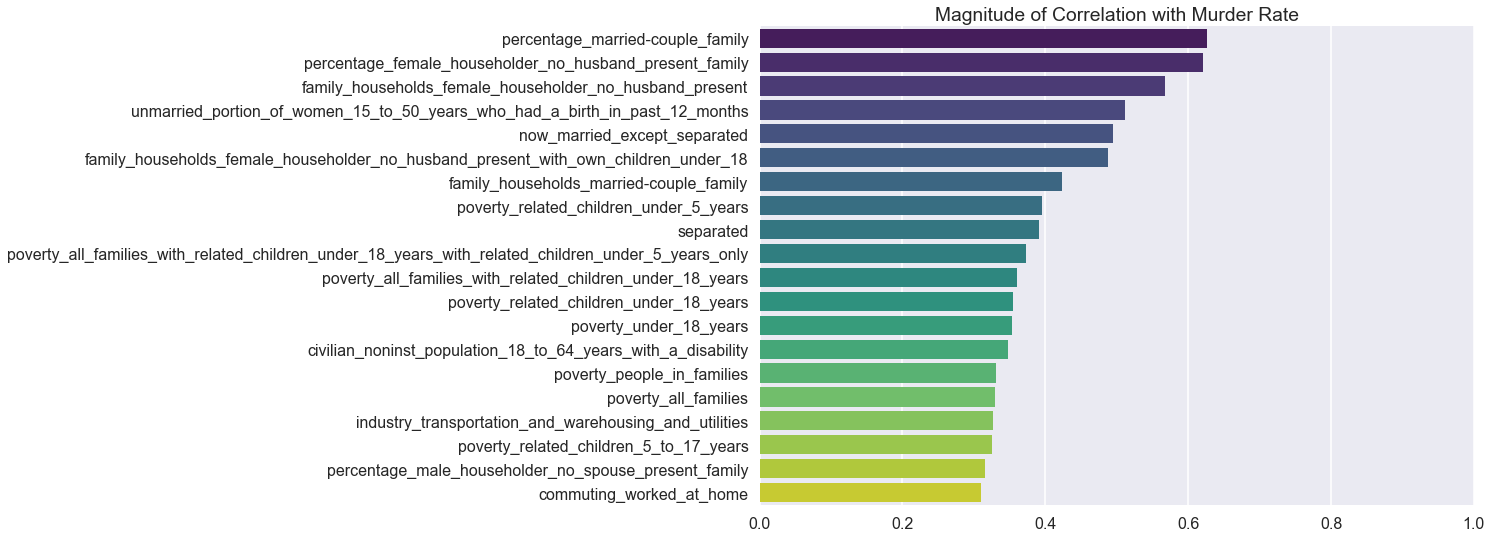

In [19]:
items = feat['murder_per_100_k']
labels = list(zip(*items))[0]
scores = list(zip(*items))[1]

sns.barplot(scores, labels, palette='viridis')
plt.xlim(0.,1.0)
plt.title('Magnitude of Correlation with Murder Rate');

#### Correlation heatmap

In [20]:
df_used = df_2010.rename(columns={'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months':
                               'unmarried_women_who_had_a_birth_in_past_12_months'})[cols_important]

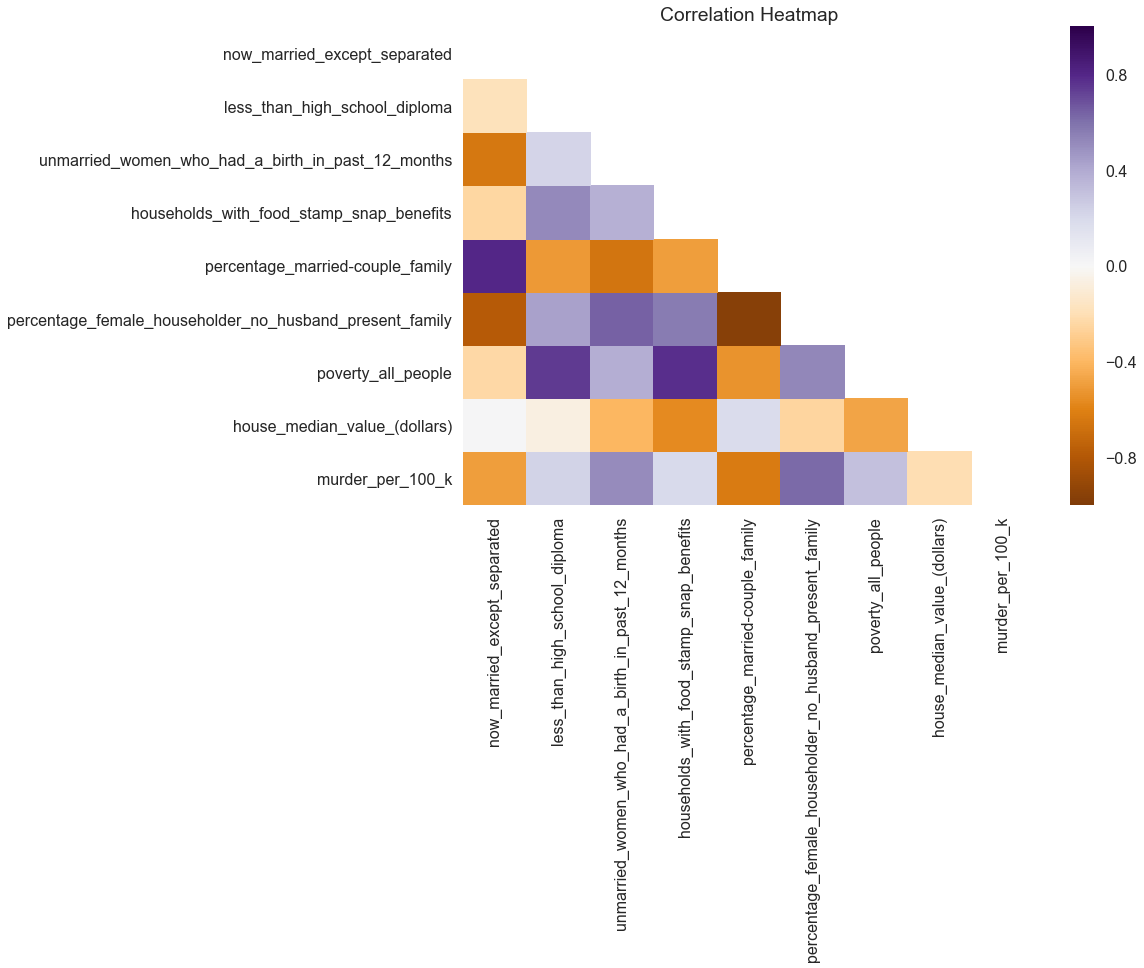

In [21]:
mask = np.zeros_like(df_used.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df_used.corr(), cmap='PuOr', mask=mask)
    plt.title('Correlation Heatmap');

### EDA on all data

#### Data import

In [22]:
df_all = pd.read_csv('../data/merged/all_data_2006_to_2016.csv')

In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 13 columns):
MSA_orig                                                                       928 non-null object
MSA_corr                                                                       928 non-null object
MSA_abbr                                                                       928 non-null object
year                                                                           928 non-null int64
now_married_except_separated                                                   928 non-null float64
less_than_high_school_diploma                                                  928 non-null float64
unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months    928 non-null float64
households_with_food_stamp_snap_benefits                                       928 non-null float64
percentage_married-couple_family                                               928 non-null float64


#### Histogram

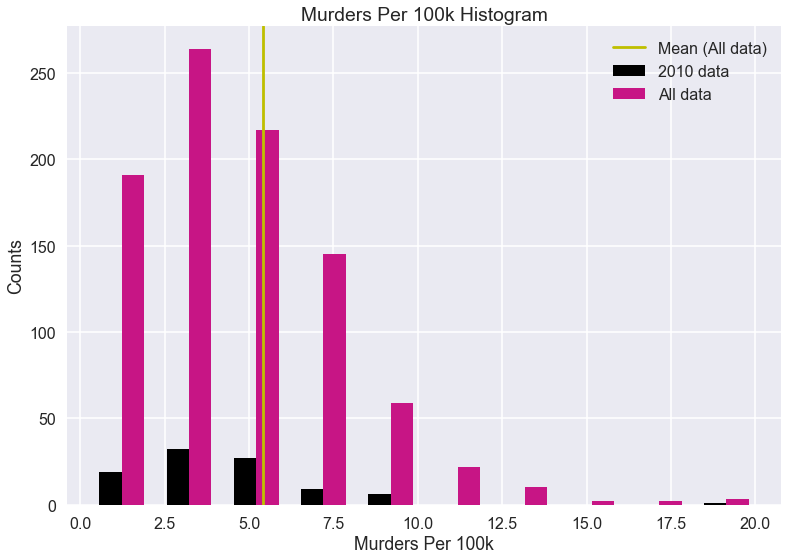

In [24]:
with sns.axes_style("darkgrid"):
    np.random.seed(0)
    fig, ax = plt.subplots()

    a_heights, a_bins = np.histogram(df_2010['murder_per_100_k'])
    b_heights, b_bins = np.histogram(df_all['murder_per_100_k'], bins=a_bins)

    width = (a_bins[1] - a_bins[0])/3

    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='black',
           label='2010 data')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='mediumvioletred',
           label='All data')
    plt.axvline(df_all.murder_per_100_k.mean(), 0, 1, color='y', label='Mean (All data)')
    plt.xlabel("Murders Per 100k")
    plt.ylabel("Counts")
    plt.title("Murders Per 100k Histogram")
    plt.legend()

#### Scatter plots

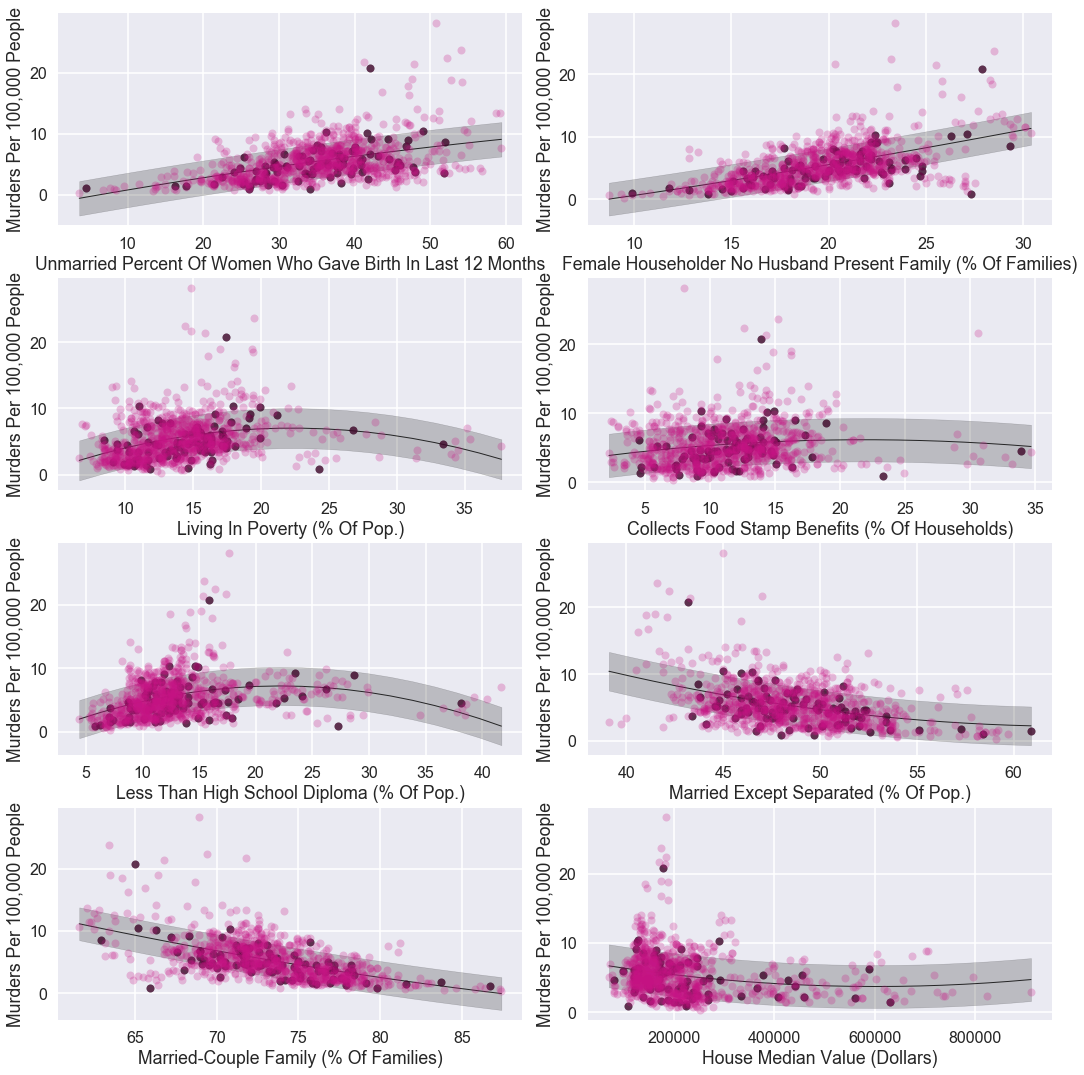

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
plt.tight_layout()
x_vals = np.linspace(0, 1, 100)
x_vals = x_vals.reshape(len(x_vals),1)
ax = ax.ravel()
y_2010 = df_2010.murder_per_100_k
y_all = df_all.murder_per_100_k
for i in range(0, len(selected_cols)-1):
    x_2010 = df_2010[selected_cols[i]]
    x_all = df_all[selected_cols[i]]
    params = np.polyfit(x_all, y_all, 2)
    xp_all = np.linspace(x_all.min(), x_all.max(), 20)
    yp_all = np.polyval(params, xp_all)
    ax[i].plot(x_2010, y_2010, 'o', markersize=8, alpha=0.75, color='black')
    ax[i].plot(xp_all, yp_all, 'k', alpha=0.8, linewidth=1)
    ax[i].plot(x_all, y_all, 'o', markersize=8, alpha=0.25, color='mediumvioletred')
    sig = np.std(y_all - np.polyval(params, x_all))
    ax[i].fill_between(xp_all, yp_all - sig, yp_all + sig, color='k', alpha=0.2)
    ax[i].set_xlabel(selected_col_x_vals[i])
    ax[i].set_ylabel(selected_col_x_vals[-1])

#### Pair plots

In [26]:
df_all_2 = df_all.drop(['MSA_orig', 'MSA_corr', 'MSA_abbr', 'year'], axis=1).copy()
df_2010_2 = df_2010[list(df_all_2)].copy()
df_all_2['dataset'] = 'all'
df_2010_2['dataset'] = '2010'
df_both = pd.DataFrame(np.vstack((df_2010_2, df_all_2)))
df_both.columns = list(df_all_2)
cols = [df_both.columns[-1]] + [col for col in df_both if col != df_both.columns[-1]]
df_both = df_both[cols]
df_both.head()

dataset now_married_except_separated less_than_high_school_diploma  \
0    2010                         47.9                          10.7   
1    2010                         46.7                           8.9   
2    2010                         46.9                          13.2   
3    2010                         51.3                          12.3   
4    2010                         48.7                          12.5   

  unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months  \
0                                                 41                            
1                                               26.2                            
2                                               44.6                            
3                                               37.7                            
4                                               37.9                            

  households_with_food_stamp_snap_benefits percentage_married-couple_family  \
0                                     12.9                             73.7   
1                                     10.3                             76.1   
2                                     12.1                               69   
3                                      9.8                             76.2   
4                                     11.3                             71.6   

  percentage_female_householder_no_husband_present_family poverty_all_people  \
0                                               19.8                    15.5   
1                                               17.9                    11.5   
2                                               20.6                    17.2   
3                                               17.2                    11.7   
4                                               21.6                    14.8   

  house_median_value_(dollars) murder_per_100_k  
0                       145000              3.7  
1                       199000              1.5  
2                       183300              5.8  
3                       218700              3.5  
4                       175900              6.1

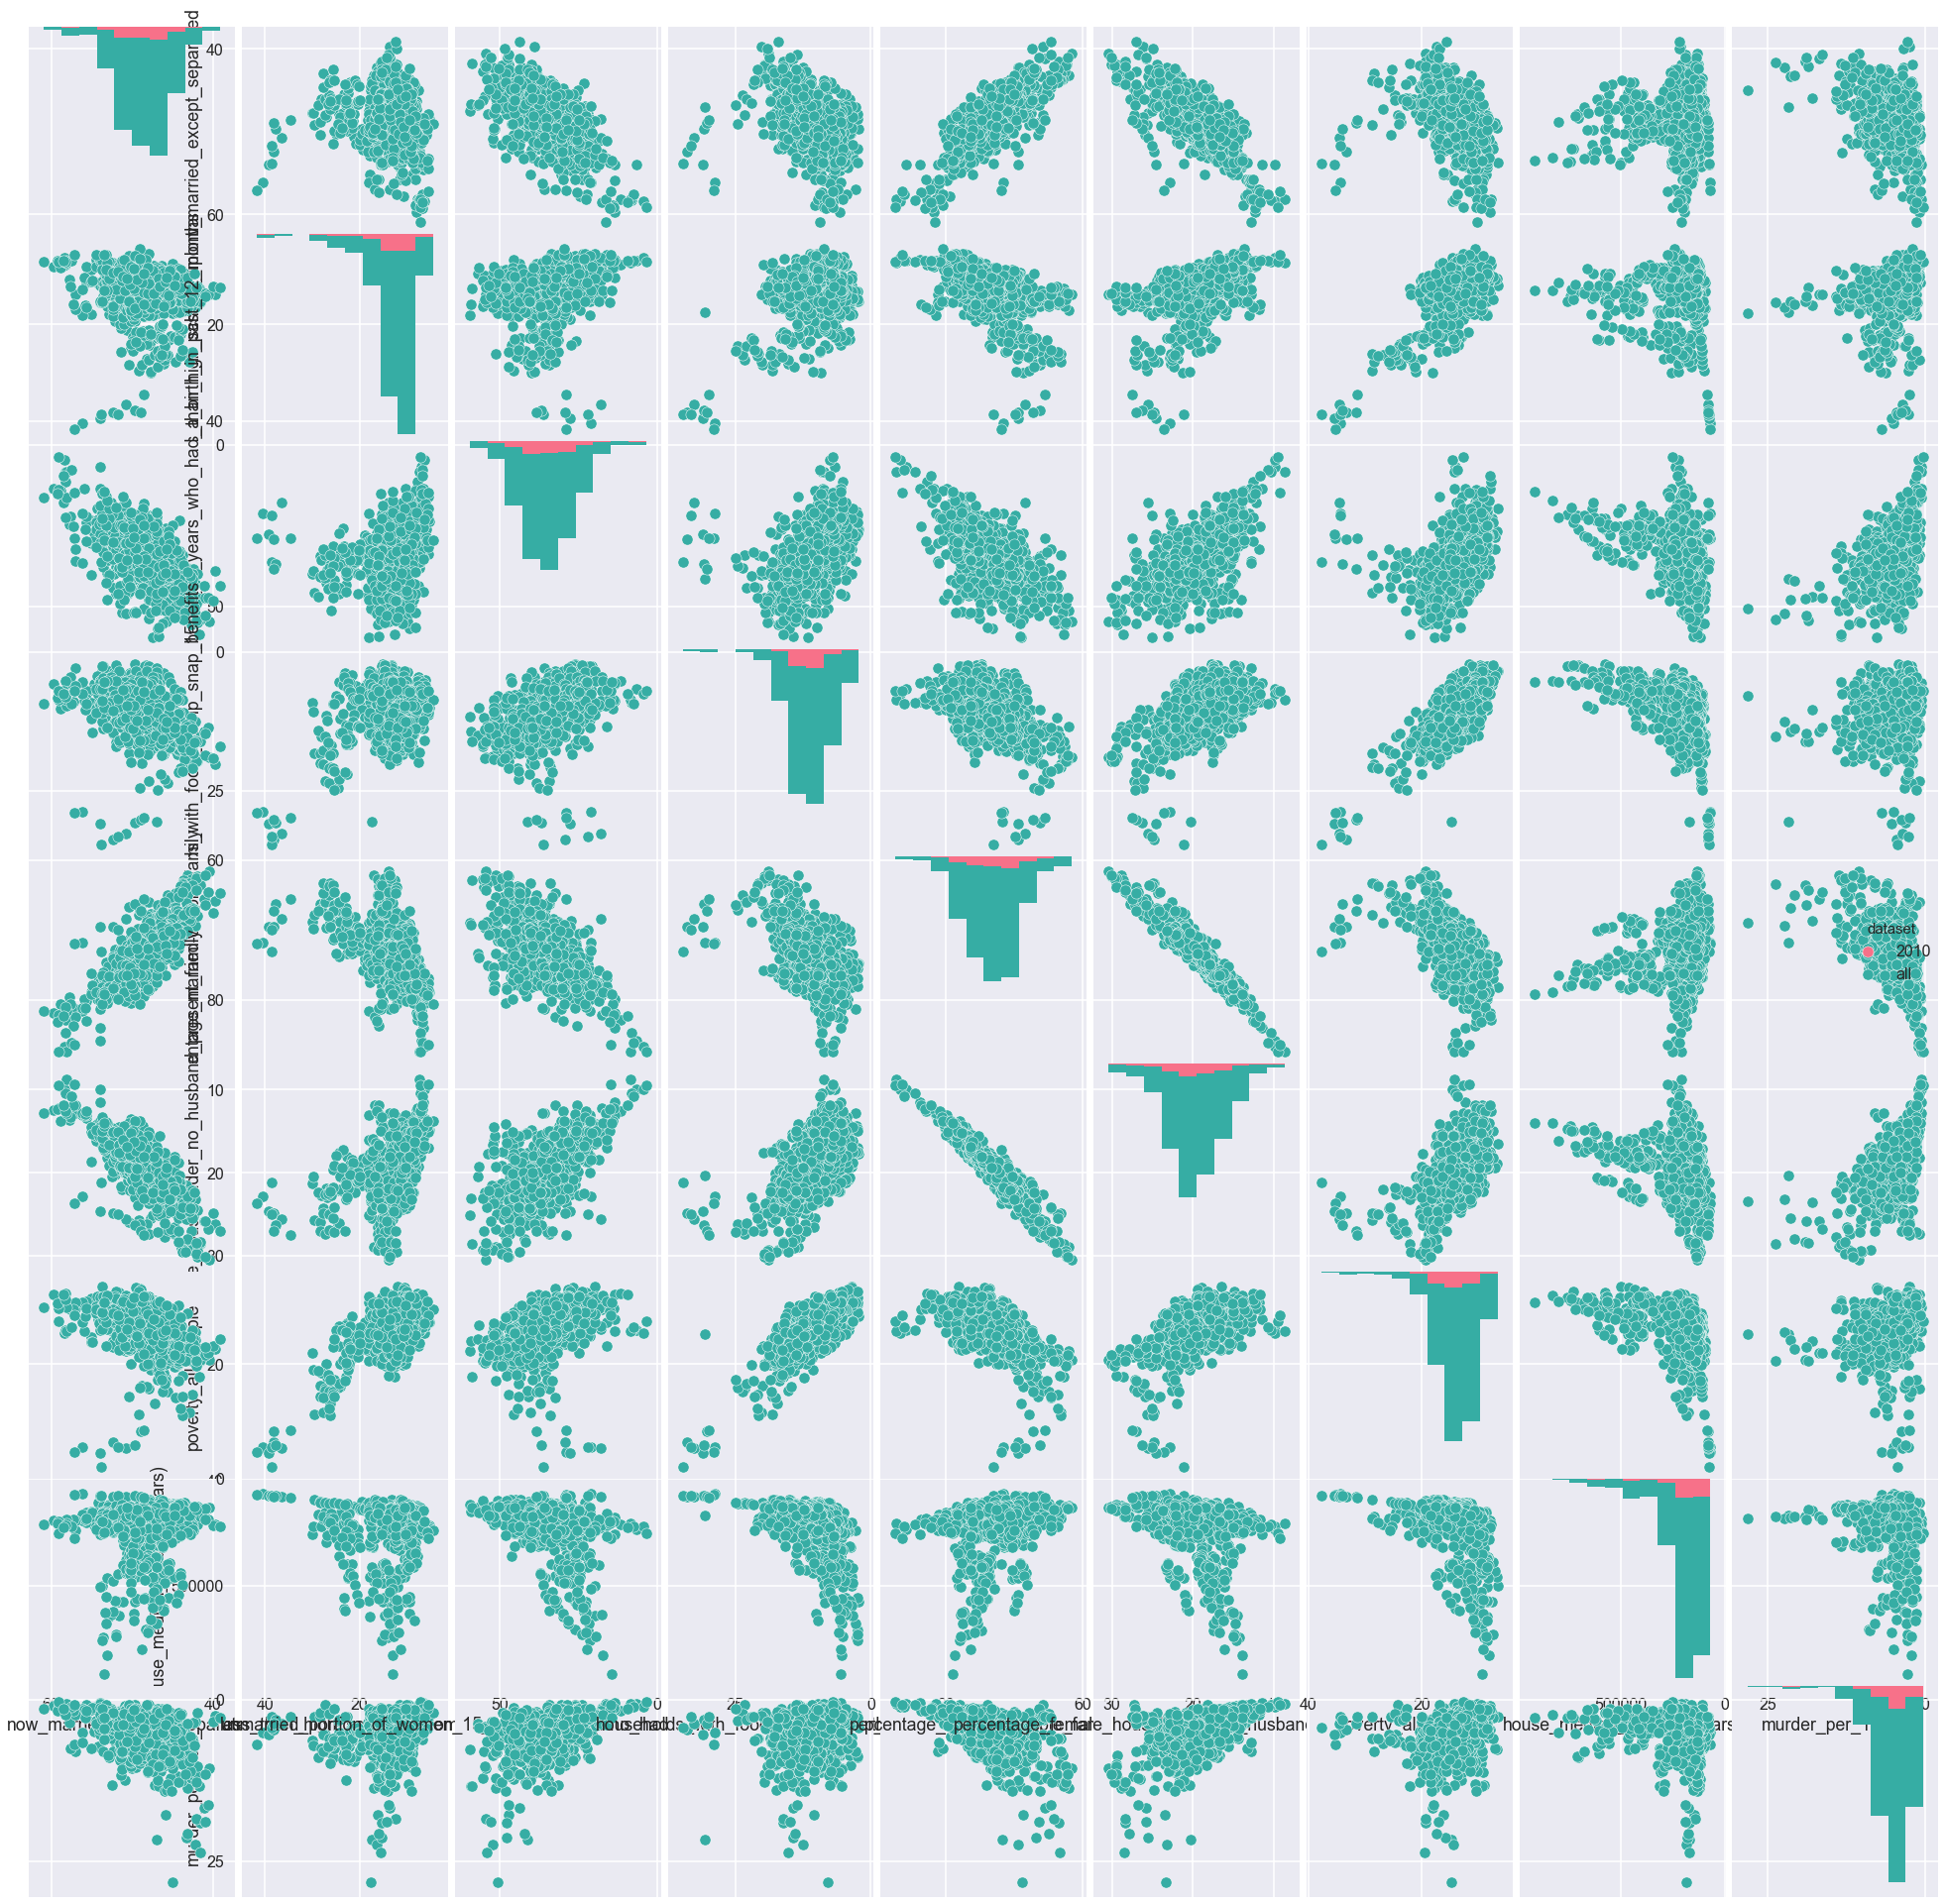

In [27]:
# we chose not to include on the website due to the illegible labels
sns.pairplot(df_both, hue="dataset", palette="husl");

In [28]:
def print_runtime():
    hours = int(str(end)[0:2])-int(str(start)[0:2])
    minutes = int(str(end)[3:5])-int(str(start)[3:5])
    seconds = int(str(end)[6:8])-int(str(start)[6:8])
    if hours < 0:
        hours = hours + 24
    if minutes < 0:
        minutes = minutes + 60
        hours = hours - 1
    if seconds < 0:
        seconds = seconds + 60
        minutes = minutes - 1
    print(hours, "hrs", minutes, "mins", seconds, "secs")

In [29]:
end = datetime.datetime.time(datetime.datetime.now())

In [30]:
print_runtime()

0 hrs 0 mins 31 secs
